In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
chess = pd.read_csv('/content/chess_games.csv')

In [39]:
chess.head()[:5]

,game_id,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation,rating_difference,time
0,1,False,13,Out of Time,White,15,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,5,Slav Defense: Exchange Variation,Slav Defense,NaN,Exchange Variation,309,15
1,2,True,16,Resign,Black,5,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,NaN,Kennedy Variation,61,5
2,3,True,61,Mate,White,5,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,3,King's Pawn Game: Leonardis Variation,King's Pawn Game,NaN,Leonardis Variation,-4,5
3,4,True,61,Mate,White,20,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,3,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game,NaN,Zukertort Variation,-15,20
4,5,True,95,Mate,White,30,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,5,Philidor Defense,Philidor Defense,NaN,NaN,54,30


In [8]:
chess.isnull().sum()

game_id                  0
rated                    0
turns                    0
victory_status           0
winner                   0
time_increment           0
white_id                 0
white_rating             0
black_id                 0
black_rating             0
moves                    0
opening_code             0
opening_moves            0
opening_fullname         0
opening_shortname        0
opening_response     18851
opening_variation     5660
dtype: int64

In [10]:
chess.columns

Index(['game_id', 'rated', 'turns', 'victory_status', 'winner',
       'time_increment', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_code', 'opening_moves',
       'opening_fullname', 'opening_shortname', 'opening_response',
       'opening_variation'],
      dtype='object')

**correlacion**




In [7]:
chess[['rated', 'turns',  'white_rating', 'black_rating', 'opening_moves']].corr()

,rated,turns,white_rating,black_rating,opening_moves
rated,1.000000,0.090698,0.003284,0.032655,-0.001906
turns,0.090698,1.000000,0.129753,0.160467,0.055999
white_rating,0.003284,0.129753,1.000000,0.634171,0.277379
black_rating,0.032655,0.160467,0.634171,1.000000,0.255396
opening_moves,-0.001906,0.055999,0.277379,0.255396,1.000000


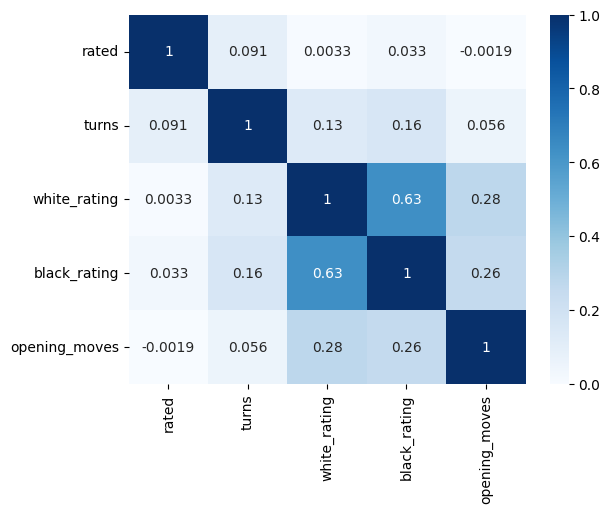

In [38]:
sns.heatmap(data = chess[['rated', 'turns',  'white_rating', 'black_rating', 'opening_moves']].corr(), annot = True, cmap = 'Blues')
plt.show()

<Axes: title={'center': 'Winning Color'}>

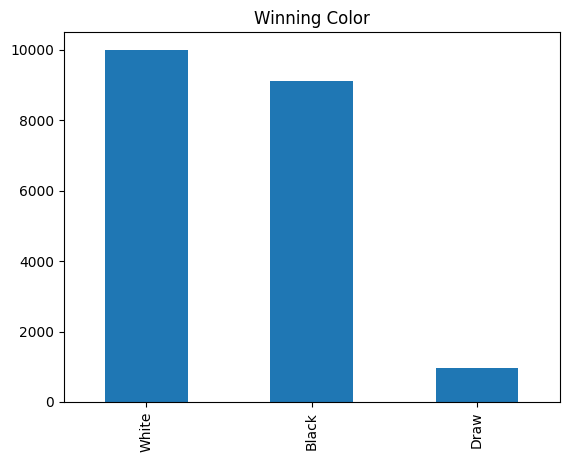

In [12]:
chess['winner'].value_counts().plot(kind = 'bar', title = 'Winning Color')

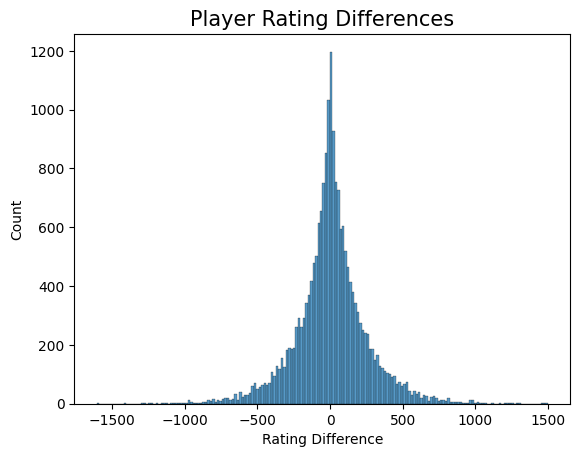

In [17]:
chess['rating_difference'] = chess['white_rating'] - chess['black_rating']

sns.histplot( x = chess['rating_difference'])
plt.title('Player Rating Differences', size = 15)
plt.xlabel('Rating Difference')
plt.show()

In [19]:
chess['opening_shortname'].value_counts()

Sicilian Defense       2632
French Defense         1412
Queen's Pawn Game      1233
Italian Game            981
King's Pawn Game        917
                       ... 
Valencia Opening          1
Australian Defense        1
Doery Defense             1
Pterodactyl Defense       1
Global Opening            1
Name: opening_shortname, Length: 128, dtype: int64

<Axes: title={'center': 'Winning Color'}>

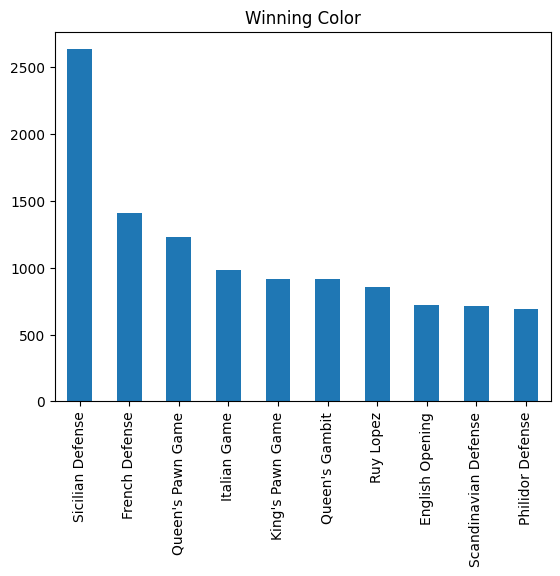

In [21]:
chess['opening_shortname'].value_counts()[0:10].plot(kind = 'bar', title ='Most common opening')

In [24]:
chess['turns'].value_counts()

53     303
45     302
51     299
57     297
39     297
      ... 
216      1
208      1
176      1
218      1
201      1
Name: turns, Length: 211, dtype: int64

<Axes: title={'center': 'turns to win'}>

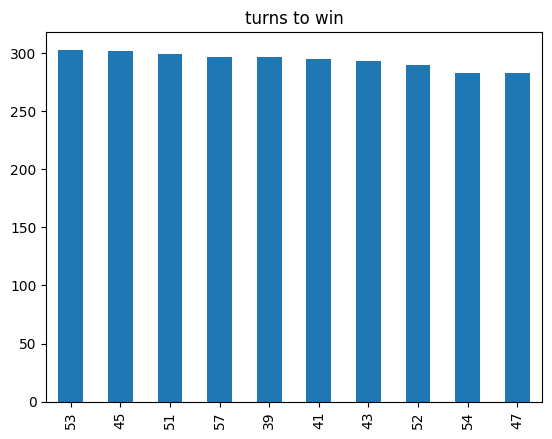

In [25]:
chess['turns'].value_counts()[0:10].plot(kind = 'bar', title ='turns to win')

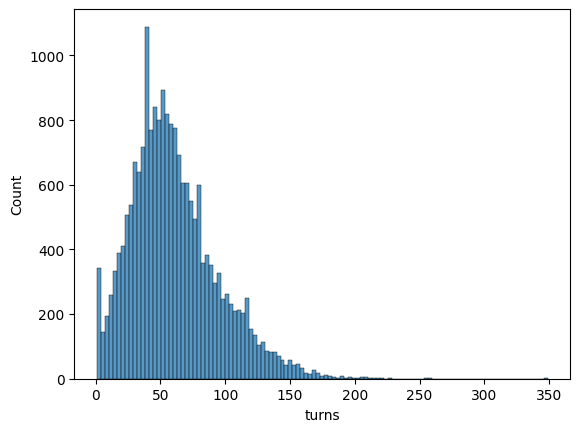

In [41]:
sns.histplot(chess['turns'])
plt.show()

<Axes: >

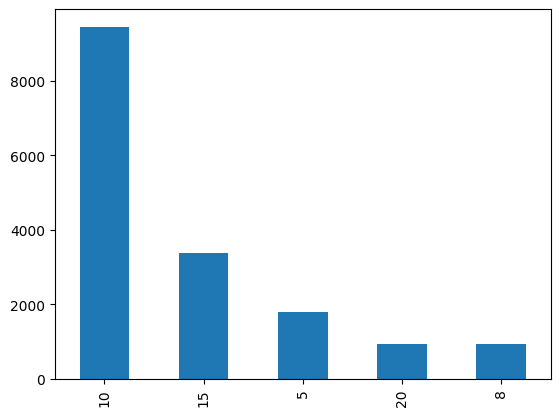

In [28]:
chess['time_increment'] = chess['time_increment'].str.split('+').str[0]
chess['time'] = pd.to_numeric(chess['time_increment'])
chess['time'].value_counts()[:5].plot(kind = 'bar')